In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.style.use('netflix.mplstyle')
palette = {'primary': '#221f1f', 'secondary': '#b20710', 'accent': '#e50914', 'tertiary': '#f5f5f1'}

In [2]:
reviews = pd.read_csv('data/reviews_clean.csv', index_col='review_id')
reviews.head()

,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
review_id,,,,,,,,
5704482,raeldor-96879,After Life,9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","['1', '1']"
5704483,dosleeb,The Valhalla Murders,6.0,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,"['2', '2']"
5704493,UniqueParticle,Unstoppable,8.0,Excellent last film of legendary Director Tony...,3 May 2020,0,A suspenseful thrilling adventure about a loos...,"['3', '4']"
5704496,Hellooo1234321,Dangerous Lies,NaN,Not bad,3 May 2020,0,Highlight was Camila Mendes exceptional acting...,"['2', '3']"
5704507,indieevan,The Master,8.0,"Great Potential, Less Great Execution",3 May 2020,0,"The premise was a 10, but the execution left a...","['1', '1']"


In [3]:
titles = pd.read_csv('data/netflix_titles_clean.csv', index_col='show_id')
titles.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
movies = titles[titles['type']=='Movie']
shows = titles[titles['type']=='TV Show']

<AxesSubplot:>

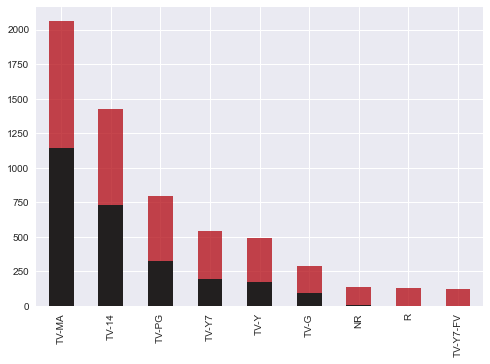

In [5]:
tv_rating_order = ('TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA')
tv_rating_meanings = ('All Children', 'Directed to Older Children', 'Directed to Older Children, Fantasy Violence', 'General Audience', 'Parental Guidance Suggested', 'Parents Strongly Cautioned', 'Mature Audience Only')

fig, ax = plt.subplots()
movies['rating'].value_counts().plot(kind='bar', ax=ax, alpha=0.75, color=palette['secondary'])
shows['rating'].value_counts().plot(kind='bar', ax=ax)


<AxesSubplot:xlabel='duration'>

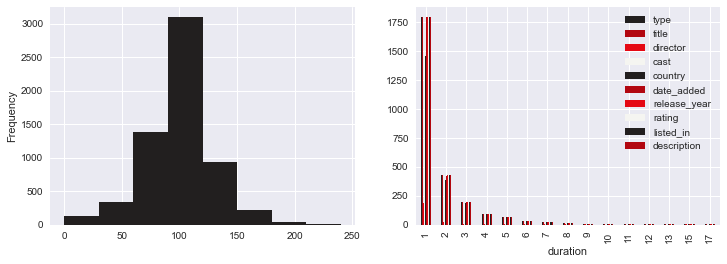

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axs

bins = [0, 30, 60, 90, 120, 150, 180, 210, 240]
# pd.cut(movies['duration'], bins=bins)

movies['duration'].plot(kind='hist', bins=bins, ax=ax1)
shows.groupby('duration').count().plot(kind='bar', x='', ax=ax2)